# <span style = "color: Brown;"> K-Means Clustering </span>

### <span style = "color:Orange;">**Task**</span>- To predict the optimum number of clusters

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### 2. Importing Dataset

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.shape

(150, 6)

There 150 rows and 6 features in teh dataset

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no null values, Species is a <span style = "color:green;">categorical variable</span> while the variables are <span style = "color: green;">numerical</span>.

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris = iris.drop("Id", axis = 1)

Deleting the ID column from the dataset.

In [7]:
iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
X = iris.iloc[:,0:-1].values

### 3. Elbow - Method

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

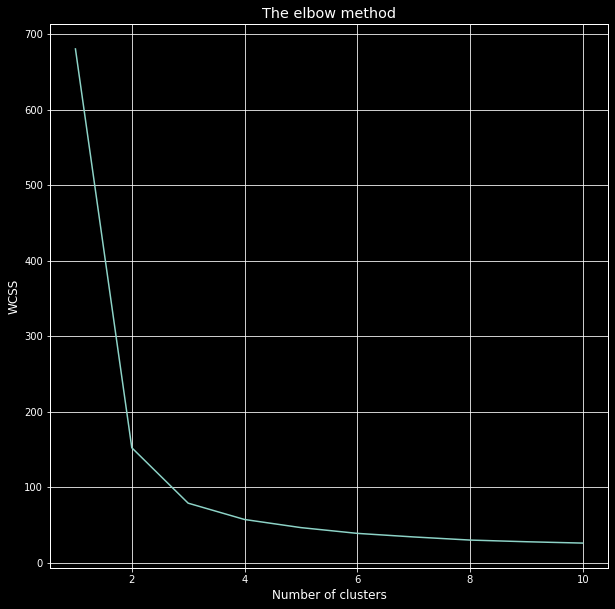

In [13]:
# `allowing us to observe 'The elbow'
plt.figure(figsize = (10,10))

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares

plt.show()

Using the **elbow method**, by calculating the <span style = "color:purple;">within cluster sum of squares (wcss)</span> - the elbow occurs in the value **3**. This method is used to find the optimum number of clusters in <span style = "color:red;">K-Means Clustering algorithm</span>. 

### 4. Verification

*To corroborate the results from the elbow method, unique values from the species are displayed*

In [14]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Hence, there are three species.

### 5. Plotting the clusters

In [15]:
kmeans  = KMeans(n_clusters = 3, init= "k-means++", n_init = 10, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(X)
y.dtype

dtype('int32')

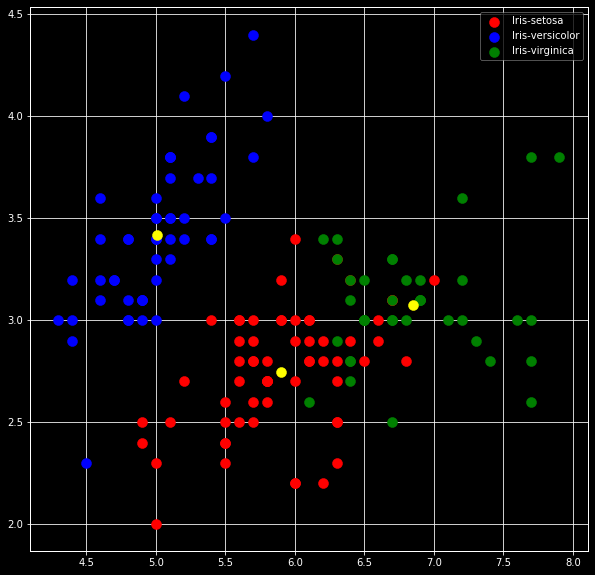

In [16]:
plt.figure(figsize = (10,10))

plt.style.use('dark_background')
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], 
            s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],c = 'yellow', s= 100)
plt.legend()